# SciPy

A biblioteca SciPy disponibiliza muitas funcionalidades de computação científica implementadas de forma eficiente, incluindo integração numérica, interpolação, otimização, álgebra linear e Estatística. A documentação completa pode ser encontrada em [docs.scipy.org/doc](https://docs.scipy.org/doc/). Os módulos disponíveis no SciPy incluem:

 1. *cluster*: Algoritmos de agrupamento hierárquicos e por quantização vetorial
 2. *constants*: Constantes físicas e matemáticas
 3. *fftpack*: Funções relacionadas à transformada rápida de Fourier
 4. *integrate*: Funções para calcular integrais e equações diferenciais ordinárias
 5. *interpolate*: Interpolação e *splines* de suavização
 6. *linalg*: Álgebra linear
 7. *optimize*: Otimização e funções para encontrar raízes
 8. *signal*: Processamento de sinais
 9. *spatial*: Algoritmos, estruturas de dados espaciais e distâncias
 10. *stats*: Funções e distribuições estatísticas


## Funções para integração

O módulo *integrate* oferece diversas funções para calcular integrais. A primeira delas é a função *quad*, que permite computar uma integral definida de uma variável:

In [3]:
from scipy.integrate import quad

x2 = lambda x: x**2
integral = quad(x2, 0, 2)
print('resultado: {}, erro: {}'.format(integral[0], integral[1]))

resultado: 2.666666666666667, erro: 2.960594732333751e-14


In [5]:
import numpy as np

def normal_fdp(x, mu, sigma_2):
    return np.exp(-(x - mu) ** 2 / (2 * sigma_2)) / np.sqrt(2 * np.pi * sigma_2)

standard_fdp = lambda x: normal_fdp(x, 0, 1)
integral = quad(standard_fdp, -3, 3)
print('P(0 < X < 2): {}, erro: {}'.format(integral[0], integral[1]))

P(0 < X < 2): 0.9973002039367399, erro: 1.1072256503105314e-14


Para computar integrais duplas, triplas e sobre múltiplas variáveis, o módulo oferece respectivamente as funções *dblquad*, *tplquad* e *nquad*.

## Funções para interpolação

Para interpolar funções 1D, o ódulo *interpolate* possui a função *interp1d*. Essa função é chamada com dois vetores *x* e *y* e retorna uma função que pode ser chamda para usar interpolação e encontrar novos valores de *y* para novos valores de *x*. 

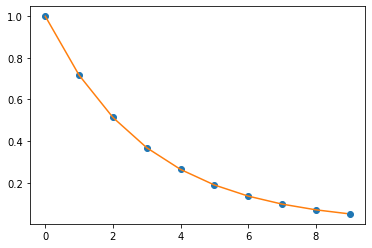

In [7]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x = np.arange(0, 10)
y = np.exp(-x / 3.0)
f = interp1d(x, y)

x_new = np.arange(0, 9, 0.1)
y_new = f(x_new)
plt.plot(x, y, 'o', x_new, y_new, '-')
plt.show()

## Funções espaciais

O módulo *spatial* contém diversas funções para calcular distâncias, realizar transformações espaciais, encontrar envólucros convexos, etc. As masis de 20 funções de distâncias são encontradas no submódulo *spatial.distance* e incluem distâncias entre vetores e entre linhas de matrizes. A função *pdist* permite calcular as distâncias par-a-par entre as linhas de uma matriz *X*:

In [14]:
from scipy.spatial.distance import pdist

X = np.arange(12).reshape(4, 3)
print(pdist(X))

[ 5.19615242 10.39230485 15.58845727  5.19615242 10.39230485  5.19615242]


O retorno da função *pdist* é uma matriz condensada na forma de um vetor, para economizar espaço. A ideia é que a matriz de distâncias original tem diagonal *0* e valores espelhados. Para recuperar a matriz quadrada original, pode-se usar a função *squareform*:

In [13]:
from scipy.spatial.distance import squareform

print(squareform(pdist(X)))

[[ 0.          5.19615242 10.39230485 15.58845727]
 [ 5.19615242  0.          5.19615242 10.39230485]
 [10.39230485  5.19615242  0.          5.19615242]
 [15.58845727 10.39230485  5.19615242  0.        ]]


A função *pdist* permite escolher a métrica de distância utilizada, tendo a distância Euclidiana como padrão. Por exemplo, para se calcular a distância Euclidiana quadrática, pode-se fazer:

In [15]:
print(squareform(pdist(X, metric='sqeuclidean')))

[[  0.  27. 108. 243.]
 [ 27.   0.  27. 108.]
 [108.  27.   0.  27.]
 [243. 108.  27.   0.]]


Para calcular as distâncias entre as linhas de uma matriz $A$ e as de uma matriz $B$, usa-se a função *cdist*, que, assim como a função *pdist*, permite escolher a métrica.

In [20]:
from scipy.spatial.distance import cdist

A = np.arange(30).reshape(10, 3)
B = np.random.random((4, 3))

print(cdist(A, B, metric='cityblock'))

[[ 1.34456146  2.86959699  2.62154191  2.99312365]
 [ 9.7159794  10.21055376 10.69500693 10.57217568]
 [18.7159794  19.21055376 19.69500693 19.57217568]
 [27.7159794  28.21055376 28.69500693 28.57217568]
 [36.7159794  37.21055376 37.69500693 37.57217568]
 [45.7159794  46.21055376 46.69500693 46.57217568]
 [54.7159794  55.21055376 55.69500693 55.57217568]
 [63.7159794  64.21055376 64.69500693 64.57217568]
 [72.7159794  73.21055376 73.69500693 73.57217568]
 [81.7159794  82.21055376 82.69500693 82.57217568]]


## Funções de otimização

O módulo *optimize* oferece funções para minimização ou maximização de funções objetivo, com a possibilidade de forçar restrições. A principal função desse módulo é a *minimize*, que precisa receber como parâmetros uma função que será minimizada e uma solução inicial. Outros parâmetros incluem argumentos extras para a função minimizada, o método de minimização escolhido (padrão *BFGS*), possíveis restrições, uma função para calcular a Hessiana, um parâmetro e tolerância para critério de parada, entre outros.

In [30]:
from scipy.optimize import minimize

f = lambda x: x ** 2
x0 = 10

res = minimize(f, x0)
print(res.x)

[-4.14270251e-08]


In [31]:
x0 = 1
res = minimize(f, x0)
print(res.x)

[-7.45036449e-09]


In [37]:
x0 = 10
bounds = [(0, None)]

res = minimize(f, x0, bounds=bounds)
print(res.x)

[2.88291837e-15]


In [38]:
x0 = 1
bounds = [(0, None)]

res = minimize(f, x0, bounds=bounds)
print(res.x)

[0.]


A função *minimize* pode ser usada para estimar modelos. Por exemplo, vamos usá-la para estimar um modelo de regressão linear:

In [45]:
np.random.seed(42)
X = np.random.random(1000)
y = 3 * X + 2 + np.random.normal(size=1000)

betas = np.random.normal(size=2)

sq_err = lambda b, x, y: np.mean(((x*b[1] + b[0]) - y) ** 2)

res = minimize(sq_err, betas, args=(X, y))
print(res.x)

[2.17478032 2.84521493]
